In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('data_cleaned.csv')

In [3]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [4]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [5]:
#seperating the dependent and independent data

x = data.drop(['Survived'], axis = 1)
y = data['Survived']

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [7]:
x = ss.fit_transform(x)

In [8]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 96, stratify = y ) 

In [9]:
#implmenting kNN
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [10]:
clf = KNN(n_neighbors= 1)
clf.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [11]:
train_predict = clf.predict(train_x)

In [12]:
k = f1_score(train_y, train_predict)
print('The k score =:', k)

The k score =: 0.9766536964980544


In [13]:
test_predict = clf.predict(test_x)
k = f1_score(test_y, test_predict)
print('The k score:', k)

The k score: 0.7011494252873564


In [14]:
#defing a function for the test_k and train_k
def F1score(k):
    train_1 = []
    test_1 = []
    for i in k:
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        
        tmp = clf.predict(train_x)
        tmp = f1_score(tmp, train_y)
        train_1.append(tmp)
        
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp, test_y)
        test_1.append(tmp)
        
    return train_1, test_1

In [15]:
k = range(1, 150)

In [19]:
train_1, test_1 = F1score(k)

In [21]:
score = pd.DataFrame({'train_score': train_1, 'test_score': test_1}, index= k)
score

,train_score,test_score
1,0.976654,0.701149
2,0.804651,0.595745
3,0.820926,0.708075
4,0.773034,0.628571
5,0.771784,0.675497
...,...,...
145,0.552632,0.517241
146,0.552632,0.517241
147,0.552632,0.517241
148,0.552632,0.517241


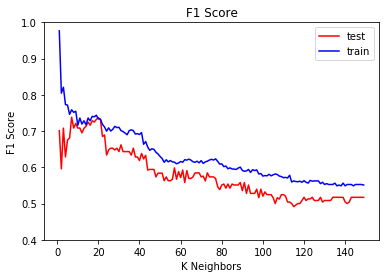

In [24]:
#plotting the data
plt.plot(k, test_1, color = 'red', label = 'test')
plt.plot(k, train_1, color = 'blue', label = 'train')
plt.xlabel('K Neighbors')
plt.ylabel('F1 Score')
plt.title('F1 Score')
plt.ylim(0.4, 1)
plt.legend()

In [26]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 42, stratify = y ) 

In [27]:
k = range(1, 50)
train_1, test_1 = F1score(k)

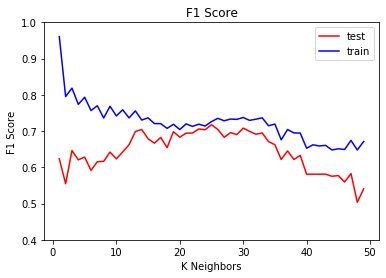

In [28]:
plt.plot(k, test_1, color = 'red', label = 'test')
plt.plot(k, train_1, color = 'blue', label = 'train')
plt.xlabel('K Neighbors')
plt.ylabel('F1 Score')
plt.title('F1 Score')
plt.ylim(0.4, 1)
plt.legend()